In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
def array_shift(array, shift = 'right'):
    """смещаем массив в сторону, добавляя ноль"""
    if shift == 'right':
        return np.insert(array, 0, 0)[:-1] # add 0 in the beginning
    elif shift == 'left':
        return np.append(array, 0)[1:]
    else:
        print('Shift incorrect')

def build_conv_operator(conv_fun):
    
    N = conv_fun.shape[0]
    mas = np.zeros((N, N))
    
    # у нас ведь свертка а не кросс валидация, поэтому сделаем разворот.
    conv_fun =  np.flip(conv_fun)
    mas[N//2,:] = conv_fun
    for i in range(N//2, 0,-1):
        mas[i-1, :] = array_shift(mas[i, :], 'left')
    for i in range(N//2, N-1, 1):
        mas[i+1, :] = array_shift(mas[i, :], 'right')
    return mas


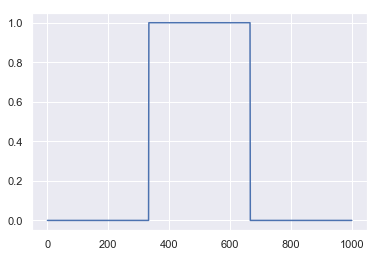

In [4]:
N = 1000
conv_fun = np.zeros(N)
conv_fun[int(N/3):int(2*N/3)] = 1
plt.plot(conv_fun)

In [5]:
def take_saw(N):
    # так и не понял зачем мне это
    mas=np.zeros(N)
    mas[:N//2] = np.linspace(0,1,N//2)
    mas[N//2:] = np.linspace(1,0,N//2)
    return mas

In [6]:
N = 100

#convolve operator
conv_fun = np.zeros(N)
conv_fun[int(N/3):int(2*N/3)] = 1
conv_operator = build_conv_operator(conv_fun)
conv_fun = conv_fun[:,np.newaxis]

#signal 
x = np.linspace(0,10,N)
signal = np.sin(x)
signal = signal[:,np.newaxis]
signal += np.random.randn(N,1)/100


signal = take_saw(N)





In [10]:
signal = np.linspace(0,1,N) 
signal[N//5:N//2]  = signal[N//5:N//2]**2

for i in range(N//2, N- 1, N//10):
    signal[i:i+100] = np.random.random()
    
signal = signal[:,np.newaxis]
signal += np.random.randn(N,1)/10

In [11]:

signal_obraz = np.fft.rfft(signal.flatten())
conv_obraz = np.fft.rfft(conv_fun.flatten())
signal_obraz_inv =np.fft.ifft(signal_obraz)  


result = np.fft.ifft(signal_obraz*conv_obraz, n = N)


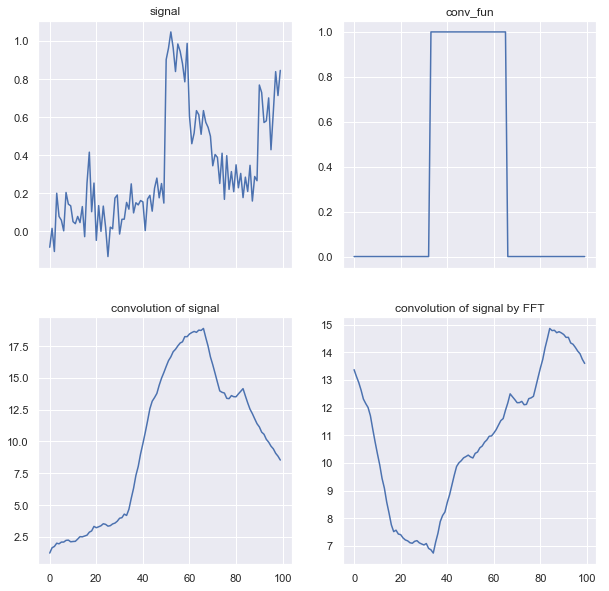

In [12]:
##plt.plot(np.dot(conv_operator, signal))
fig, ax = plt.subplots(2,2, figsize = (10,10), sharex=True)
ax[0,0].set_title('signal')
ax[0,0].plot(signal)

ax[0,1].set_title('conv_fun')
ax[0,1].plot(conv_fun)

ax[1,0].set_title('convolution of signal')
ax[1,0].plot(np.dot(conv_operator, signal))

ax[1,1].set_title('convolution of signal by FFT')
ax[1,1].plot(np.flip(result))
